# Assignment Multiple Linear Regression

## Toyota Corolla dataset

In [75]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Read CSV File
toyota = pd.read_csv("data/ToyotaCorolla.csv")
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### In the Problem statement it is written that we should only consider the following columns

> "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

### For that we need to perform some EDA

### So We need to drop other columns

In [77]:
toyota_df = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [78]:
toyota_df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### looking for the nan values

In [79]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### No nan values found in this dataset

#### Taking care of outliers

In [80]:
toyota_df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


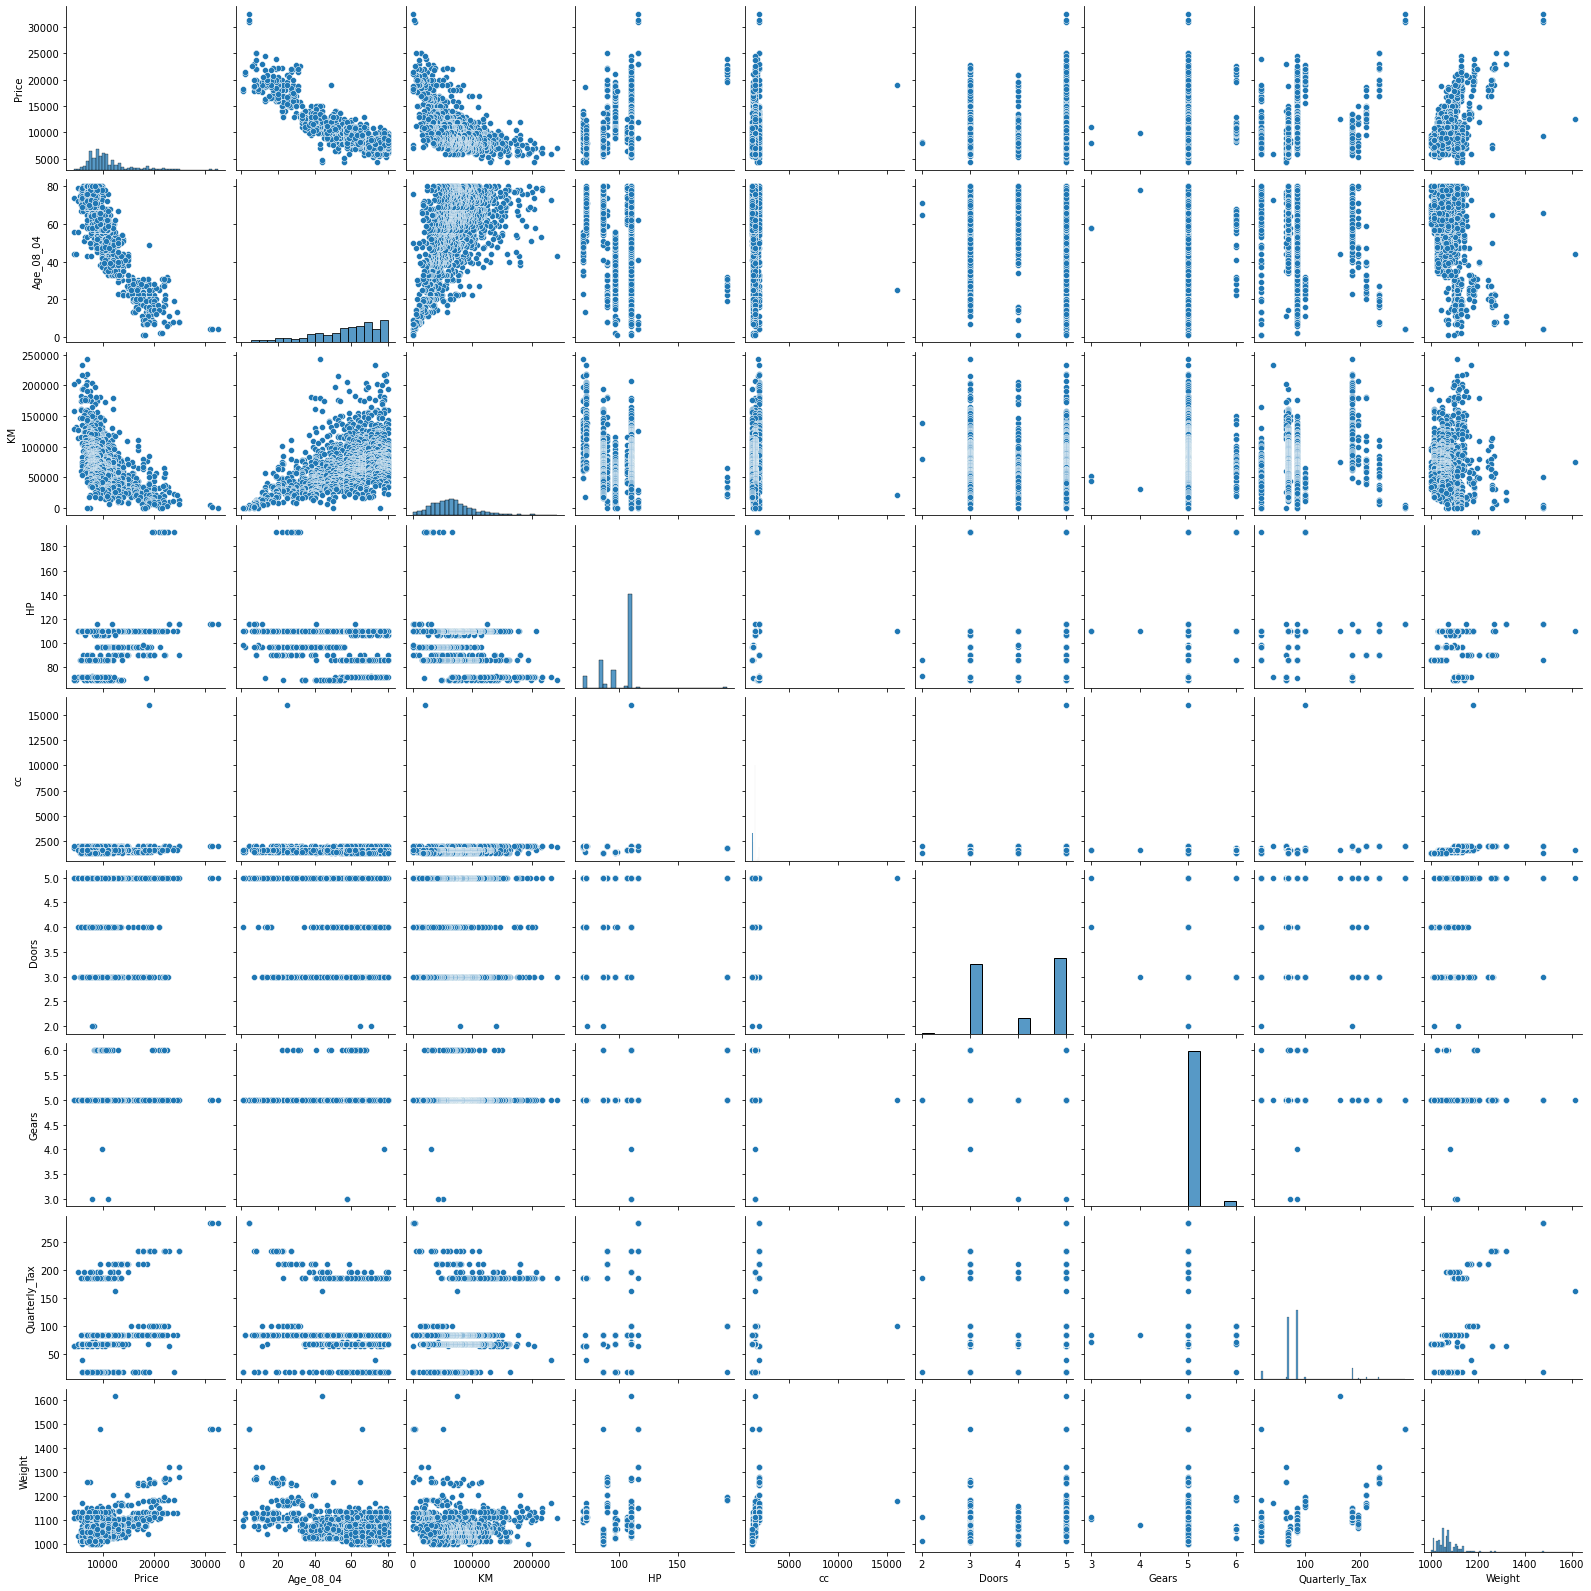

In [81]:
sns.pairplot(toyota_df)

#### Correlation

<AxesSubplot:>

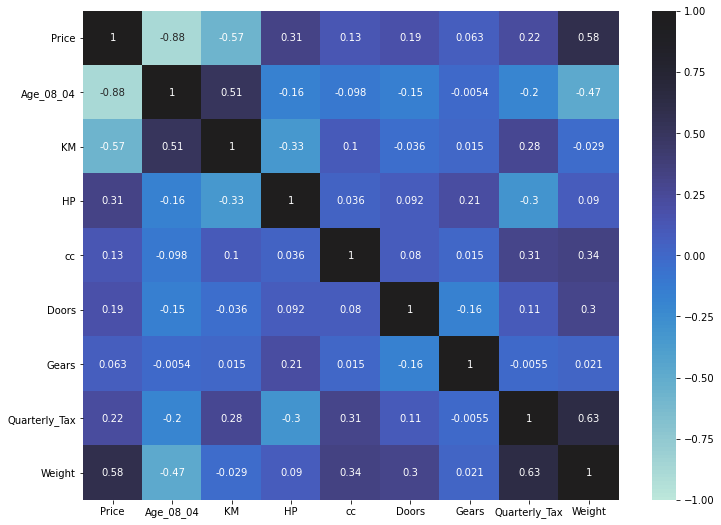

In [82]:
plt.figure(figsize=(12, 9))
sns.heatmap(toyota_df.corr(), annot=True, vmin=-1, vmax=1, center=True)

### Log Transformation

In [83]:
tr_toyota = np.log(toyota_df)

In [84]:
tr_toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,9.510445,3.135494,10.757605,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
1,9.528794,3.135494,11.197351,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
2,9.543235,3.178054,10.638520,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
3,9.612467,3.258097,10.778956,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
4,9.528794,3.401197,10.558414,4.49981,7.600902,1.098612,1.609438,5.347108,7.064759


### Visualize the data

<AxesSubplot:xlabel='Price', ylabel='Density'>

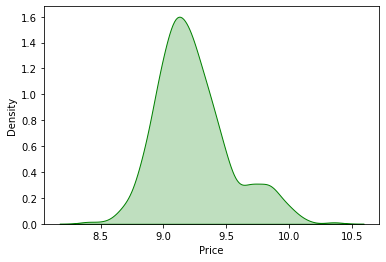

In [85]:
sns.kdeplot(tr_toyota["Price"], shade=True, color='g')

### Visually this is normally distributed dataset.. not perfectly but approximately

<AxesSubplot:>

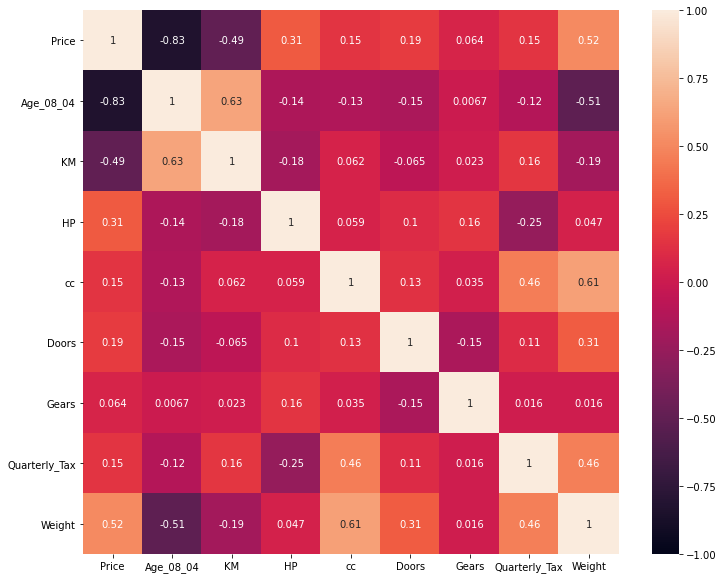

In [86]:
plt.figure(figsize=(12, 10))

sns.heatmap(tr_toyota.corr(), annot=True, vmin=-1, vmax=1)

In [87]:
import statsmodels.formula.api as smf

In [88]:
first_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = tr_toyota).fit()

In [89]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     552.5
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:04:49   Log-Likelihood:                 722.64
No. Observations:                1436   AIC:                            -1427.
Df Residuals:                    1427   BIC:                            -1380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5032      0.845      4.146      0.000       1.846       5.161
Age_08_04        -0.4446      0.012    -38.378      0.000      -0.467      -0.422
KM                0.0144      0.005      2.928      0.003       0.005       0.024
HP                0.4359      0.029     15.229      0.000       0.380       0.492
cc               -0.2015      0.040     -5.055      0.000      -0.280      -0.123
Doors             0.0193      0.017      1.125      0.261      -0.014       0.053
Gears             0.2903      0.108      2.689      0.007       0.079       0.502
Quarterly_Tax     0.0546      0.011      5.008      0.000       0.033       0.076
Weight            0.8686      0.137      6.357      0.000       0.601       1.137
==============================================================================
Omnibus:                      333.267   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1546.413
Skew:                          -1.018   Prob(JB):                         0.00
Kurtosis:                       7.658   Cond. No.                     3.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
first_model.params

Intercept        3.503197
Age_08_04       -0.444618
KM               0.014449
HP               0.435936
cc              -0.201516
Doors            0.019295
Gears            0.290316
Quarterly_Tax    0.054579
Weight           0.868595
dtype: float64

In [91]:
rsquared, rsquared_adj, f_aic = (first_model.rsquared, first_model.rsquared_adj, first_model.aic)

In [92]:
print(rsquared)
print(rsquared_adj)
print(f_aic)

0.7559497241305376
0.7545815375804636
-1427.283177529966


### The values of rsquared and rsquared_adj shows that the model is good

### Picking a sample from our original dataset for testing purpose

In [93]:
first_sample = toyota_df.sample(100).reset_index().drop(['index'], axis=1)

In [94]:
first_sample.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,7950,75,76382,110,1600,3,5,85,1055
1,9900,73,59240,110,1600,3,5,69,1050
2,9500,79,56214,86,1300,3,5,69,1015
3,10750,56,43700,86,1300,3,5,69,1025
4,6450,72,123403,110,1600,3,5,69,1050


### Transform the sample to log

In [95]:
tr_first_sample = np.log(first_sample)

In [96]:
# Observed values are actual values that are in dataset
observed_values = first_sample["Price"]

In [97]:
tr_first_sample.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,8.980927,4.317488,11.243502,4.700480,7.377759,1.098612,1.609438,4.442651,6.961296
1,9.200290,4.290459,10.989352,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545
2,9.159047,4.369448,10.936921,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
3,9.282661,4.025352,10.685103,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
4,8.771835,4.276666,11.723211,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545


In [98]:
tr_first_sample.drop(["Price"], axis=1)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,4.317488,11.243502,4.700480,7.377759,1.098612,1.609438,4.442651,6.961296
1,4.290459,10.989352,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545
2,4.369448,10.936921,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
3,4.025352,10.685103,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
4,4.276666,11.723211,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545
...,...,...,...,...,...,...,...,...
95,4.007333,10.861707,4.700480,7.377759,1.609438,1.609438,4.442651,6.975414
96,3.688879,10.506874,4.700480,7.377759,1.609438,1.609438,4.442651,6.993933
97,4.330733,10.723488,4.454347,7.170120,1.609438,1.609438,4.234107,6.942157
98,4.043051,10.668955,4.700480,7.377759,1.609438,1.609438,4.442651,6.980076


In [99]:
observed_values

0      7950
1      9900
2      9500
3     10750
4      6450
      ...  
95    11950
96    11990
97     7750
98     9695
99     9895
Name: Price, Length: 100, dtype: int64

### First Models Prediction

In [100]:
first_prediction =  first_model.predict(tr_first_sample)

In [101]:
first_prediction

0     9.085861
1     9.078697
2     8.947918
3     9.105786
4     9.095433
        ...   
95    9.240364
96    9.392912
97    8.988852
98    9.225747
99    9.171878
Length: 100, dtype: float64

In [102]:
first_prediction = np.exp(first_prediction)

In [103]:
first_prediction

0      8829.561051
1      8766.538491
2      7691.857202
3      9007.259942
4      8914.491361
          ...     
95    10304.783683
96    12003.006704
97     8013.250434
98    10155.258775
99     9622.676040
Length: 100, dtype: float64

In [104]:
from sklearn.metrics import mean_squared_error

In [105]:
first_model_rmse = mean_squared_error(observed_values, first_prediction, squared=False)

first_model_rmse

1769.2950184052115

### We have successfully predicted the Price

### Vif shows the colinearity in the data

In [106]:
rsquared_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tr_toyota).fit().rsquared  
vif_age = 1/(1-rsquared_age)

rsquared_km = smf.ols('KM~HP+cc+Doors+Gears+Quarterly_Tax+Weight+Age_08_04',data=tr_toyota).fit().rsquared  
vif_km = 1/(1-rsquared_km)

rsquared_hp = smf.ols('HP~cc+Doors+Gears+Quarterly_Tax+Weight+Age_08_04+KM',data=tr_toyota).fit().rsquared  
vif_hp = 1/(1-rsquared_hp)

rsquared_cc = smf.ols('cc~Doors+Gears+Quarterly_Tax+Weight+Age_08_04+KM+HP',data=tr_toyota).fit().rsquared  
vif_cc = 1/(1-rsquared_cc)

rsquared_doors = smf.ols('Doors~Gears+Quarterly_Tax+Weight+Age_08_04+KM+HP+cc',data=tr_toyota).fit().rsquared  
vif_doors = 1/(1-rsquared_doors)

rsquared_gears = smf.ols('Gears~Quarterly_Tax+Weight+Age_08_04+KM+HP+cc+Doors',data=tr_toyota).fit().rsquared  
vif_gears = 1/(1-rsquared_gears)

rsquared_quarterlytax = smf.ols('Quarterly_Tax~Weight+Age_08_04+KM+HP+cc+Doors+Gears',data=tr_toyota).fit().rsquared  
vif_quarterly = 1/(1-rsquared_quarterlytax)

rsquared_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=tr_toyota).fit().rsquared  
vif_weight = 1/(1-rsquared_weight)

In [107]:
vif_values = {"Variables":["age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"], 
              "vif_values":[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_quarterly, vif_weight]}

In [108]:
vif_values_df = pd.DataFrame(vif_values)

In [109]:
vif_values_df

,Variables,vif_values
0,age_08_04,2.342217
1,KM,1.859423
2,HP,1.199569
3,cc,1.858043
4,Doors,1.166956
5,Gears,1.066731
6,Quarterly_Tax,1.589725
7,Weight,2.649495


### This means we have moderate colinearity in our dataset


### Profit has very less correlation with the doors, gears, cc and quarterly_tax

In [110]:
# Dropping these less correlated variables to check the model accuracy

toyota_second = toyota_df.drop(["Doors", 'cc', 'Quarterly_Tax', 'Gears'], axis=1)

In [111]:
toyota_second.head()

,Price,Age_08_04,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


# Building the second model

### now lets use these four columms to predict price

In [112]:
tr_toyota_second = np.log(toyota_second)

In [113]:
tr_toyota_second.head()

,Price,Age_08_04,KM,HP,Weight
0,9.510445,3.135494,10.757605,4.49981,7.060476
1,9.528794,3.135494,11.197351,4.49981,7.060476
2,9.543235,3.178054,10.638520,4.49981,7.060476
3,9.612467,3.258097,10.778956,4.49981,7.060476
4,9.528794,3.401197,10.558414,4.49981,7.064759


<AxesSubplot:>

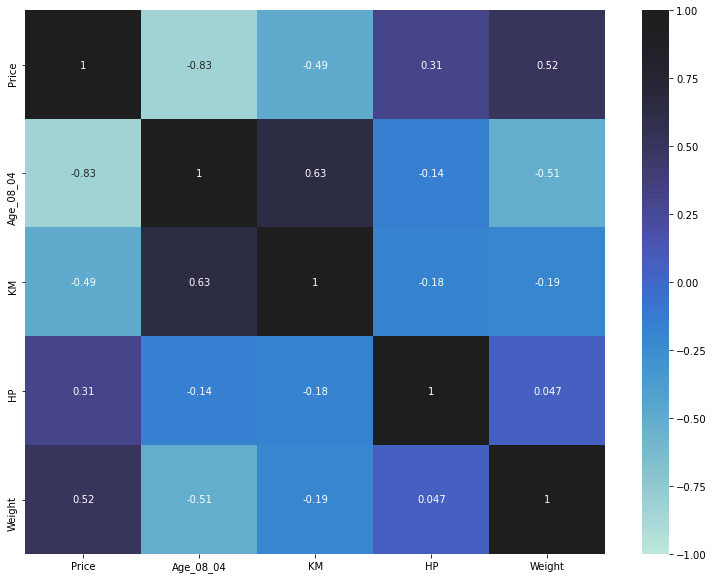

In [114]:
plt.figure(figsize=(13, 10))
sns.heatmap(toyota_second_df.corr(), annot=True, vmin=-1, vmax=1, center=True)

In [115]:
second_model = smf.ols("Price~Age_08_04+KM+HP+Weight", data = tr_toyota_second).fit()

In [116]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1058.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:04:52   Log-Likelihood:                 697.55
No. Observations:                1436   AIC:                            -1385.
Df Residuals:                    1431   BIC:                            -1359.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7357      0.732      5.104      0.000       2.300       5.171
Age_08_04     -0.4562      0.012    -39.391      0.000      -0.479      -0.433
KM             0.0180      0.005      3.691      0.000       0.008       0.028
HP             0.3994      0.027     14.770      0.000       0.346       0.452
Weight         0.7531      0.101      7.452      0.000       0.555       0.951
==============================================================================
Omnibus:                      398.718   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1955.207
Skew:                          -1.217   Prob(JB):                         0.00
Kurtosis:                       8.172   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
second_model.params

Intercept    3.735664
Age_08_04   -0.456185
KM           0.018047
HP           0.399367
Weight       0.753130
dtype: float64

In [118]:
rsquared, rsquared_adj, f_aic = (second_model.rsquared, second_model.rsquared_adj, second_model.aic)

In [119]:
print(rsquared)
print(rsquared_adj)
print(f_aic)

0.7472715297260759
0.7465650909552194
-1385.1072989045292


### The values of rsquared and rsquared_adj shows that the model is good

### Using the same sample for this model to get better result

### Transform the sample to log

In [132]:
tr_second_sample = np.log(first_sample)

In [133]:
# Observed values are actual values that are in dataset
observed_second = second_sample["Price"]

In [135]:
tr_second_sample.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,8.980927,4.317488,11.243502,4.700480,7.377759,1.098612,1.609438,4.442651,6.961296
1,9.200290,4.290459,10.989352,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545
2,9.159047,4.369448,10.936921,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
3,9.282661,4.025352,10.685103,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
4,8.771835,4.276666,11.723211,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545


In [136]:
tr_second_sample.drop(["Price"], axis=1)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,4.317488,11.243502,4.700480,7.377759,1.098612,1.609438,4.442651,6.961296
1,4.290459,10.989352,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545
2,4.369448,10.936921,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
3,4.025352,10.685103,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
4,4.276666,11.723211,4.700480,7.377759,1.098612,1.609438,4.234107,6.956545
...,...,...,...,...,...,...,...,...
95,4.007333,10.861707,4.700480,7.377759,1.609438,1.609438,4.442651,6.975414
96,3.688879,10.506874,4.700480,7.377759,1.609438,1.609438,4.442651,6.993933
97,4.330733,10.723488,4.454347,7.170120,1.609438,1.609438,4.234107,6.942157
98,4.043051,10.668955,4.700480,7.377759,1.609438,1.609438,4.442651,6.980076


### First Models Prediction

In [138]:
second_prediction =  second_model.predict(tr_second_sample)

In [139]:
second_prediction

0     9.088978
1     9.093144
2     8.932334
3     9.092145
4     9.112680
        ...   
95    9.234209
96    9.387026
97    8.960839
98    9.217947
99    9.163562
Length: 100, dtype: float64

In [140]:
second_prediction = np.exp(second_prediction)

In [141]:
second_prediction

0      8857.130215
1      8894.102651
2      7572.923646
3      8885.226589
4      9069.568211
          ...     
95    10241.553165
96    11932.560005
97     7791.894787
98    10076.356563
99     9542.988781
Length: 100, dtype: float64

In [142]:
second_model_rmse = mean_squared_error(observed_values, second_prediction, squared=False)

second_model_rmse

1730.139085710008

### The second model gives us a little less RMSE then first one.

### Our first model was overfitted as it didn't gave us a better result then second.